In [1]:
import pandas as pd

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [3]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [2]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=1000, random_state=42, stratify=df['Churn'])

In [3]:
from pycaret.classification import *

# Initialize setup
clf_setup = setup(
    data=train_df, 
    target='Churn', 
    session_id=42,
    train_size=0.8
)

# Compare models
best_models = compare_models(n_select=3)

,Description,Value
0,Session id,42
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(6043, 21)"
5,Transformed data shape,"(6043, 42)"
6,Transformed train set shape,"(4834, 42)"
7,Transformed test set shape,"(1209, 42)"
8,Numeric features,3
9,Categorical features,17


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7689,0.7811,0.7689,0.7619,0.7646,0.3867,0.3880,0.2910
lr,Logistic Regression,0.7447,0.8353,0.7447,0.7365,0.6549,0.0746,0.1541,1.0390
ridge,Ridge Classifier,0.7391,0.7884,0.7391,0.6942,0.6531,0.0665,0.1192,0.2290
et,Extra Trees Classifier,0.7371,0.6964,0.7371,0.7057,0.6341,0.0256,0.0774,0.4360
nb,Naive Bayes,0.7346,0.5000,0.7346,0.5396,0.6222,0.0000,0.0000,0.2230
dt,Decision Tree Classifier,0.7346,0.5000,0.7346,0.5396,0.6222,0.0000,0.0000,0.4480
rf,Random Forest Classifier,0.7346,0.7638,0.7346,0.5396,0.6222,0.0000,0.0000,0.6010
ada,Ada Boost Classifier,0.7346,0.5000,0.7346,0.5396,0.6222,0.0000,0.0000,0.2390
gbc,Gradient Boosting Classifier,0.7346,0.5000,0.7346,0.5396,0.6222,0.0000,0.0000,0.6570
lda,Linear Discriminant Analysis,0.7346,0.5000,0.7346,0.5396,0.6222,0.0000,0.0000,0.4300


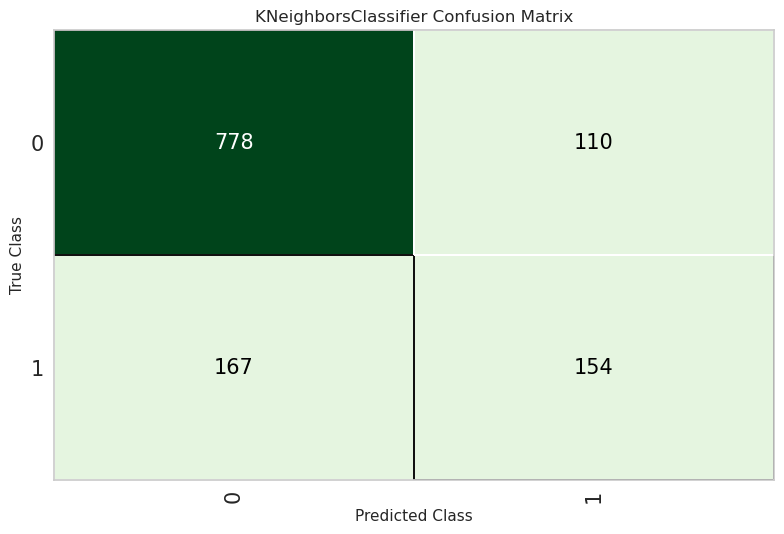

In [5]:
plot_model(best_models[0], plot='confusion_matrix')

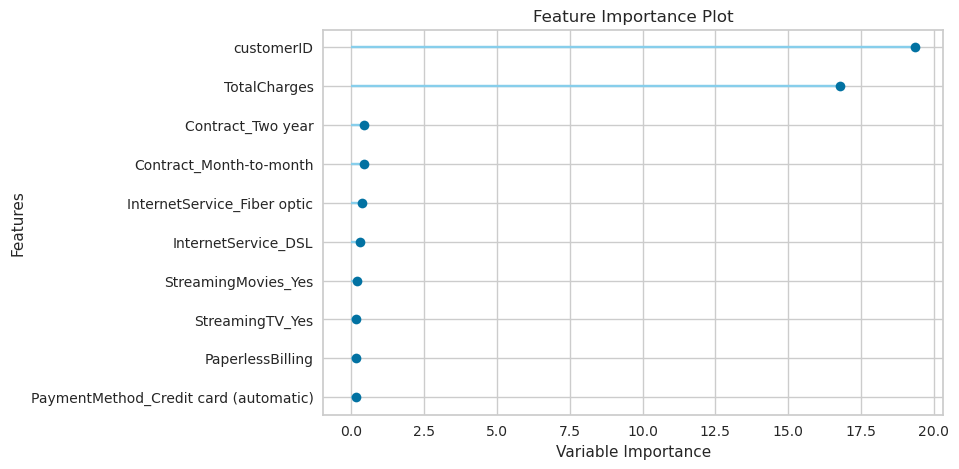

In [7]:
plot_model(best_models[1], plot='feature')

In [8]:
predictions = predict_model(best_models[0], data=test_df)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.7600,0.7801,0.7600,0.7539,0.7566,0.3671,0.3677


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
4589,1494-EJZDW,Female,0,Yes,Yes,10,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.150000,220.8,No,No,1.0
524,8397-MVTAZ,Male,0,Yes,No,34,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,100.050003,3480,Yes,No,0.6
4281,8582-KRHPJ,Male,0,No,No,50,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,35.000000,1782.4,No,No,0.8
4441,4825-FUREZ,Male,0,Yes,No,42,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Electronic check,20.250000,835.5,No,No,1.0
6478,9330-VOFSZ,Female,0,Yes,No,60,Yes,Yes,Fiber optic,No,...,Yes,Yes,Two year,Yes,Credit card (automatic),110.800003,6640.7,No,No,0.8


In [9]:
predictions = predict_model(best_models[1], data=test_df)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7450,0.8351,0.7450,0.7462,0.6536,0.0707,0.1570


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
4589,1494-EJZDW,Female,0,Yes,Yes,10,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.150000,220.8,No,No,0.9548
524,8397-MVTAZ,Male,0,Yes,No,34,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,100.050003,3480,Yes,No,0.6887
4281,8582-KRHPJ,Male,0,No,No,50,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,35.000000,1782.4,No,No,0.6474
4441,4825-FUREZ,Male,0,Yes,No,42,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Electronic check,20.250000,835.5,No,No,0.9681
6478,9330-VOFSZ,Female,0,Yes,No,60,Yes,Yes,Fiber optic,No,...,Yes,Yes,Two year,Yes,Credit card (automatic),110.800003,6640.7,No,No,0.9324


In [10]:
predictions = predict_model(best_models[2], data=test_df)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.7450,0,0.7450,0.7406,0.6551,0.0739,0.1571


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label
4589,1494-EJZDW,Female,0,Yes,Yes,10,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.150000,220.8,No,No
524,8397-MVTAZ,Male,0,Yes,No,34,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.050003,3480,Yes,No
4281,8582-KRHPJ,Male,0,No,No,50,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,35.000000,1782.4,No,No
4441,4825-FUREZ,Male,0,Yes,No,42,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Electronic check,20.250000,835.5,No,No
6478,9330-VOFSZ,Female,0,Yes,No,60,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.800003,6640.7,No,No
